# Project Title: Credit Card Fraud Detection using Machine Learning


Auteur/Author : Malick Hamidou .B

## Introduction:

Credit card fraud is a significant concern for both consumers and financial institutions. Detecting fraudulent transactions is crucial to protect customers from unauthorized charges. This project aims to develop a machine learning model that can effectively identify fraudulent credit card transactions using the "Credit Card Fraud Detection" dataset available on Kaggle.

### Dataset Overview

The dataset that we will use is as mentionned from the Kaggle dataset **Credit Card Fraud Detection** , and contains credit card transactions made by European cardholders. The dataset consists of 284,807 transactions,
out of which 492 are fraudulent. The data contains only numerical input variables which are a result of Principal Component Analysis (PCA) transformations due to confidentiality issues. The features include 'Time', 'Amount', and 'V1' through 'V28', as well as the 'Class'
variable, which is the target variable indicating whether the transaction is fraudulent (1) or
not (0).

## Data Understanding and Preprocessing

### Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Credit Card Fraud Detection/creditcard.csv')

### Data Overview

The first thing , we will check is the shapes of the dataset matrice and look inside it

In [7]:
print('Dataset Shape', dataset.shape)

Dataset Shape (284807, 31)


In [8]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


At first , we see that there are 31 columns  in which the columns **V1,V2,...V28** have been already transformed(propably they have been Scaled(Normalised/Standardised) and are anonymous for the confidentiality issues,so we can only work with the columns **Time,Amount,Class**.

In [9]:
# Check for missing values
print(dataset.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Nice , it seems there is no missing values ✅ .This will help  reduce our workload .

In [10]:
# Let's Check for unique elements and get a overview
print(dataset.nunique())
# Data overview
print(dataset.info())

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7

Here we see that the column Class take 2 unique Values 1 or 0 .the class column represents our target which is to know  if the there **Fraud** or **NoFraud**.

In [11]:
# Lets Check some statistical values for the Time and Amount Column
dataset.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Let's do some exploration by visualising some features and the target distribution

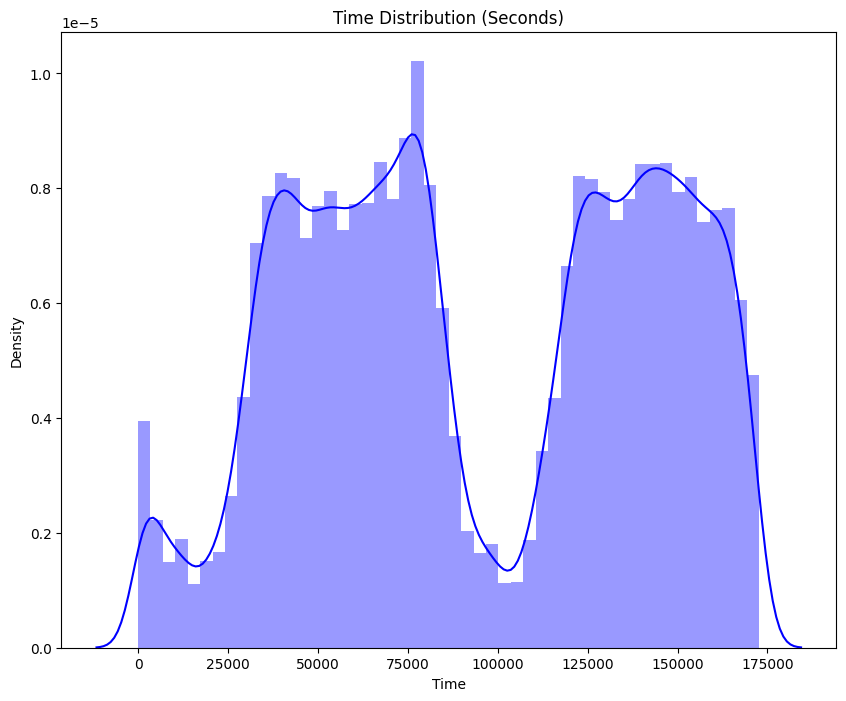

In [12]:
# Visualize the distribution of  the Time Feature
plt.figure(figsize=(10,8))
sns.distplot(dataset['Time'], color='blue')
plt.title('Time Distribution (Seconds)')
plt.show()

**Observation:**

The Time feature on the plot has 2 peaks so we have a bimodal distribution for this feature.it could indicate distinct patterns in the time distribution of transactions. In our context of credit card fraud detection, this might suggest that there are different transaction behaviors during different times of the day. Let's break down what these peaks could represent:

**First Peak (Daytime Transactions):** This peak likely represents transactions that occur during the daytime hours. These transactions could be related to regular purchases made by cardholders for everyday items.

**Second Peak (Nighttime Transactions):** The second peak might represent transactions that occur during nighttime hours when overall transaction volume is lower. These could include online transactions, automated payments, and possibly fraudulent activities.


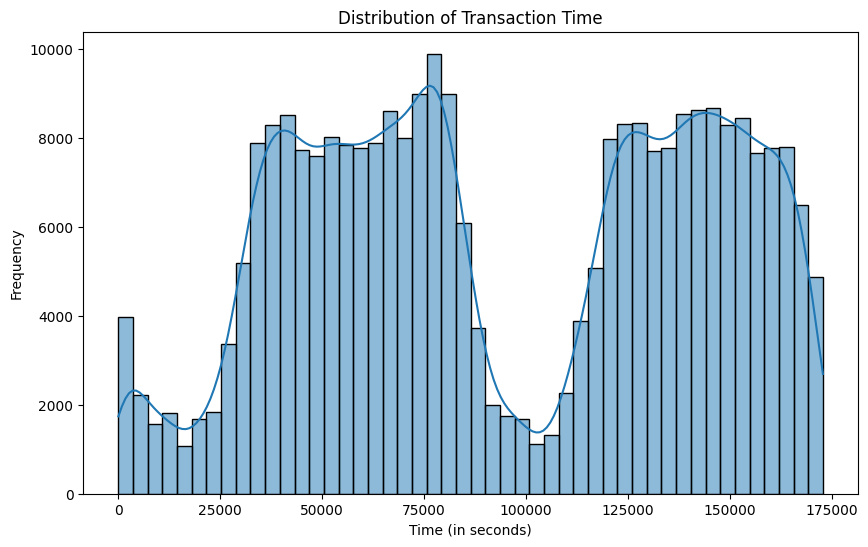

In [13]:
# Extract the 'Time' column
time_values = dataset['Time']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(time_values, bins=48, kde=True)  # Divide the day into 48 bins for hourly representation
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Frequency")
plt.show()

The first peak occurs at around 50,000 seconds (approximately 14
hours), while the second peak occurs at around 120,000 seconds (approximately 33 hours).
Let's interpret the time values of approximately 14 hours and 33 hours in terms of the daytime. To achieve this, we need to convert these hours into a clock time format, such as hours and minutes

In [14]:
def convert_to_clock_time(hours):
    # Calculate the hours and minutes
    hours = int(hours)
    minutes = int((hours - int(hours)) * 60)

    # Determine AM or PM
    if hours < 12:
        period = "AM"
    else:
        period = "PM"
        if hours > 12:
            hours -= 12

    return f"{hours:02d}:{minutes:02d} {period}"

# Convert hours to clock time
time_14_hours = convert_to_clock_time(14)
time_33_hours = convert_to_clock_time(33)

print("Time for the first peak (approximately 14 hours):", time_14_hours)
print("Time for the second peak (approximately 33 hours):", time_33_hours)

Time for the first peak (approximately 14 hours): 02:00 PM
Time for the second peak (approximately 33 hours): 21:00 PM


So the first peak occurs at 02 PM approximately and the second one at 21:00 PM

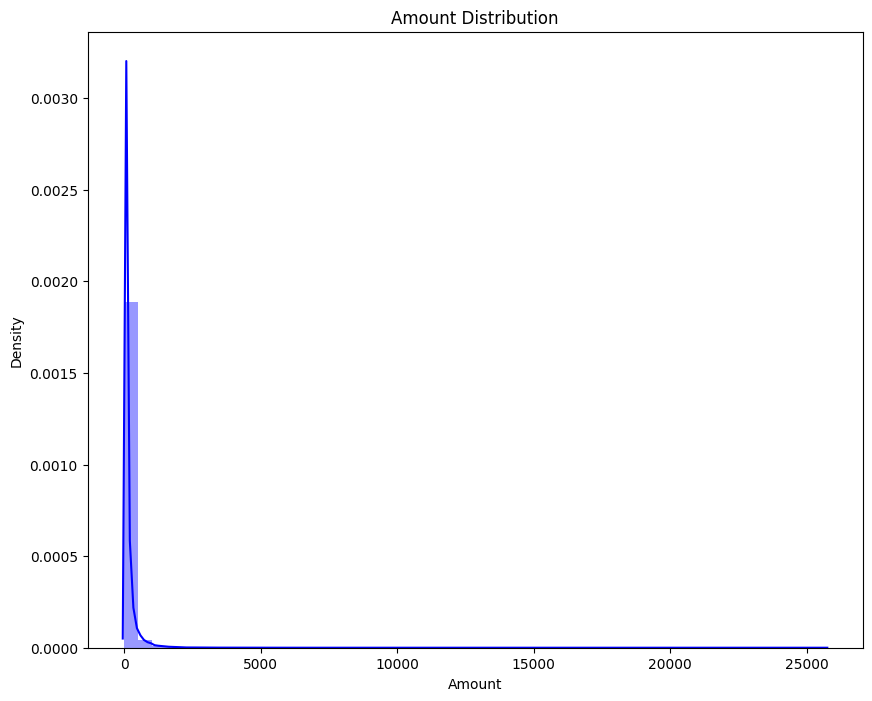

In [15]:
# Visualize the distribution of the Amount feature
plt.figure(figsize=(10,8))
sns.distplot(dataset['Amount'], color='blue')
plt.title('Amount Distribution')
plt.show()

**Observation:**

The Amount feature is highly skewed to the right , with a long tail to the right.This observation indicates that most of the transactions are of small amounts of transactions and there are few transactions with very high amounts.This could indicates that there are some outliers in the dataset and his distribution can affect the performance of some machine learning algorithms, as they might be sensitive to the scale and distribution of features.
We can handle this by using log-transformation to the 'Amount' feature. This can help reduce the skewness and make the distribution more symmetric, which can improve the performance of some algorithms.


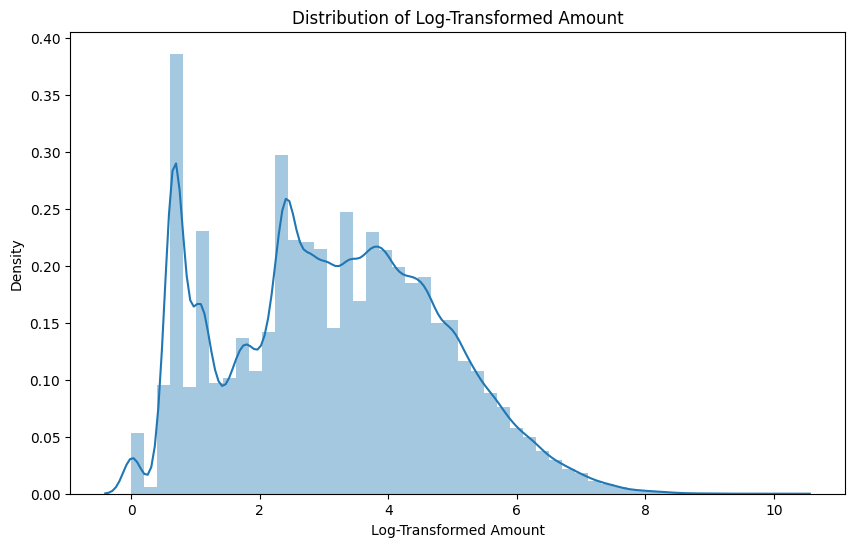

In [16]:
# Apply log-transformation to the 'Amount' feature
dataset['Amount_log'] = np.log1p(dataset['Amount'])  # Using np.log1p to handle zeros

# Plot the distribution of the log-transformed 'Amount' feature
plt.figure(figsize=(10, 6))
sns.distplot(dataset['Amount_log'], bins=50)
plt.xlabel('Log-Transformed Amount')
plt.ylabel('Density')
plt.title('Distribution of Log-Transformed Amount')
plt.show()

In [17]:
#  Let's check the Class Distribution
fraud = dataset['Class'].value_counts()[1]
nofraud = dataset['Class'].value_counts()[0]
print(f'There is : {fraud} Fraudulent transactions , and {nofraud}  Non-fraudulent transactions.')


There is : 492 Fraudulent transactions , and 284315  Non-fraudulent transactions.


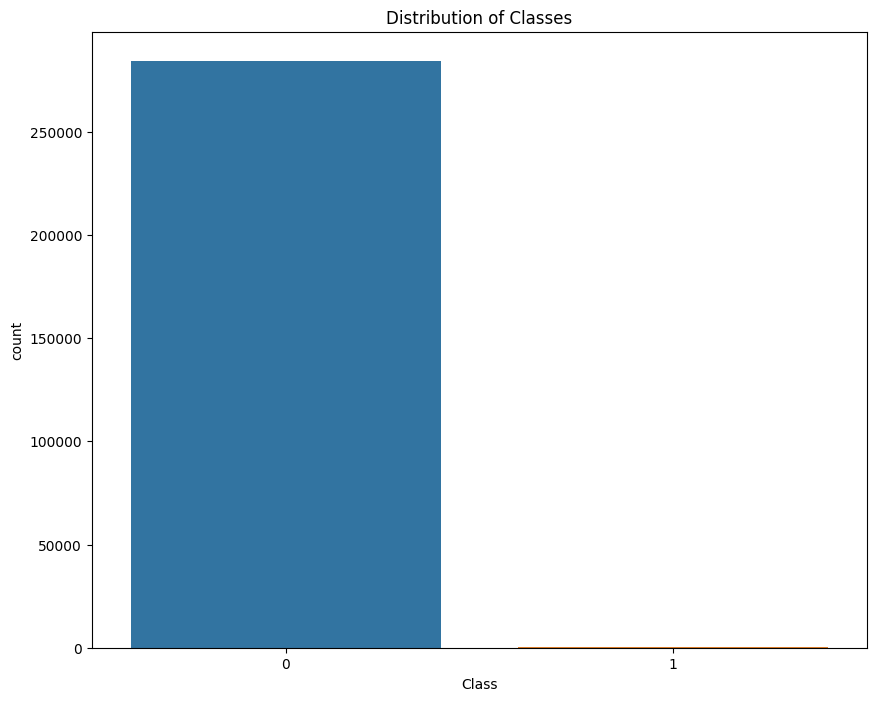

In [18]:
# Visualize the distribution of features and target
plt.figure(figsize=(10, 8))
sns.countplot(x='Class', data=dataset)
plt.title("Distribution of Classes")
plt.show()

**Observation:**

We can observe that the Class feature is imbalanced  with 284315 non-fraudulent transactions (class 0) and 492 fraudulent transactions(class 1).This class imbalance problem can affect the perofrmance of a model trained on the dataset.To address this problem we will use Oversampling here which is the SMOTE technique.

## Feature Engineering

### Correlation

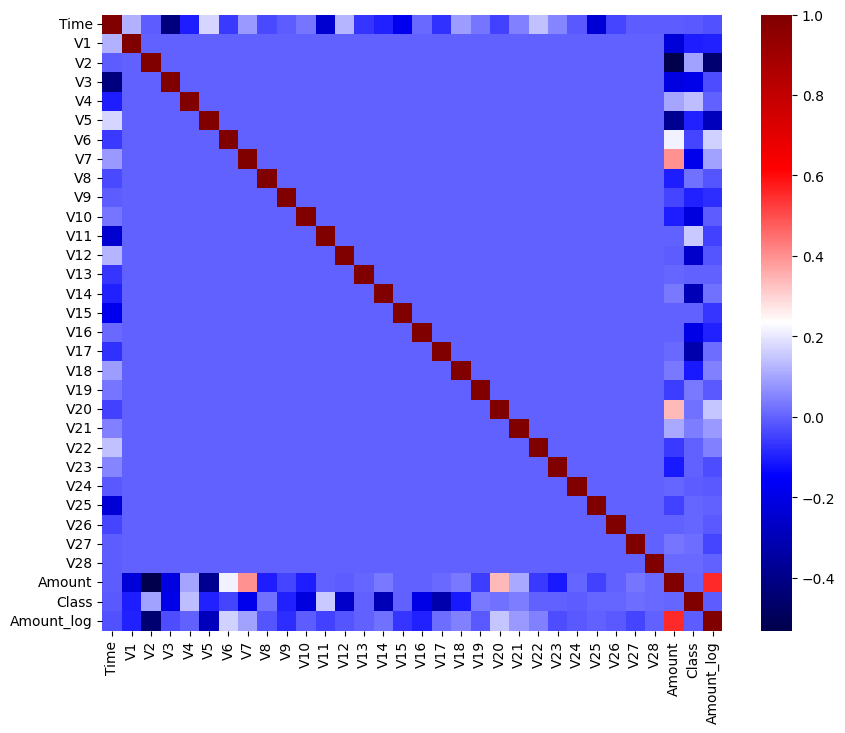

In [19]:
#Plotting heatmap to find any high correlations between variables
plt.figure(figsize=(10,8))
sns.heatmap(data=dataset.corr(), cmap="seismic", annot=False)
plt.show()


Based on the heatmap , we can observe that there are no strong positive or negative correlations in the dataset apart from Amount and Amount_log.We could directly pass to the modeling phase.

### Standardization

The "Credit Card Fraud Detection" dataset contains credit card transactions that are labeled as either fraudulent or non-fraudulent. In this context, our goal is to develop classification models that can accurately identify fraudulent transactions while minimizing false positives for non-fraudulent ones.

To address classification challenges, we employ StandardScaler on the **Amount** , **Time** columns. This preprocessing technique normalizes the data, ensuring a mean of 0 and a standard deviation of 1. This normalization leads to a more standardized distribution, enhancing the model's ability to work effectively with varying amounts and time intervals.

In [20]:
from sklearn.preprocessing import StandardScaler

# Normalize features (except 'Time' and 'Amount')
scaler = StandardScaler()
dataset[['Time', 'Amount']] = scaler.fit_transform(dataset[['Time', 'Amount']])

In [21]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,5.014760
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,1.305626
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,5.939276
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,4.824306
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,4.262539


## Modeling

### Model selection and Baseline

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Separate features and target
X = dataset.drop(['Class', 'Amount_log'], axis=1)  # Excluding 'Amount_log' as an example
y = dataset['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Baseline: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_lr))



              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

AUC-ROC: 0.946337232839112


### Advance Machine Learning models

Let's Explore various advanced models like Random Forest, Gradient Boosting, Support Vector Machines, and Neural Networks.

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb_model.predict(X_test)

# Support Vector Machine
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test)

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)
y_pred_nn = nn_model.predict(X_test)


Model: Random Forest
Cross-Validation AUC-ROC Scores: [0.99999997 0.99999942 0.99999772 1.         0.99999889]


<Figure size 800x600 with 0 Axes>

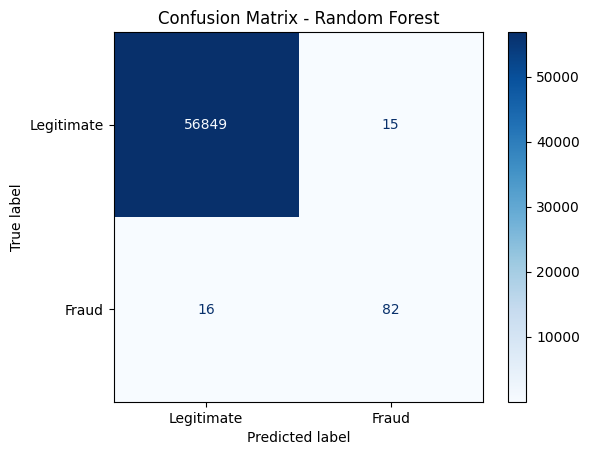

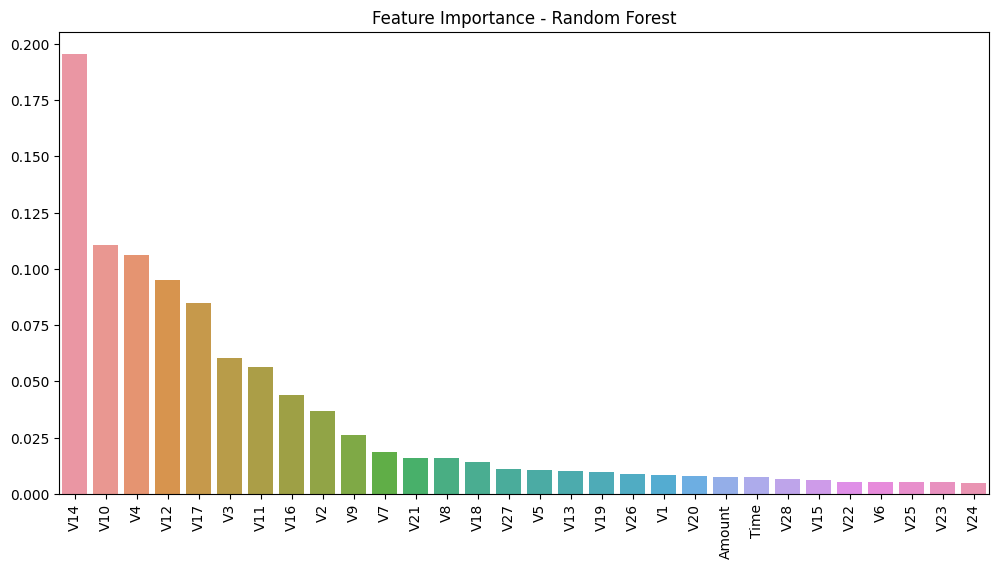

Model: Gradient Boosting
Cross-Validation AUC-ROC Scores: [0.99874798 0.99859759 0.99857688 0.99870587 0.99859635]


<Figure size 800x600 with 0 Axes>

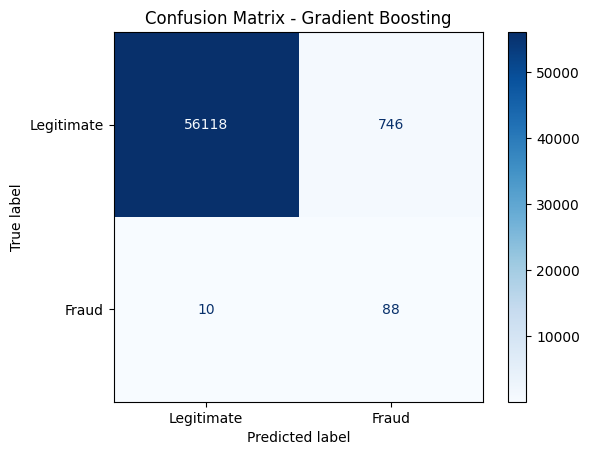

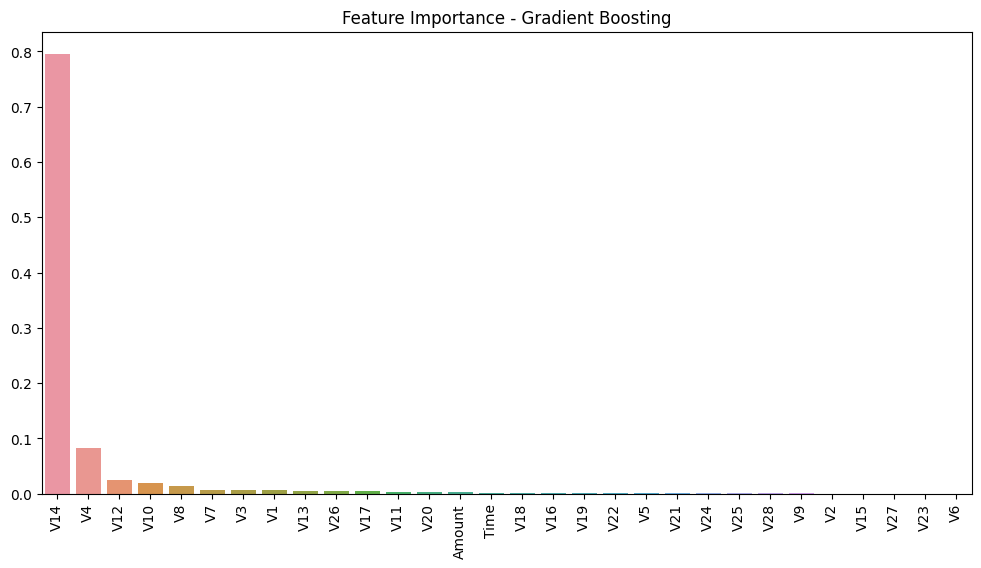

Model: Support Vector Machine
Cross-Validation AUC-ROC Scores: [0.99824455 0.99797112 0.99804096 0.99804349 0.99816761]


<Figure size 800x600 with 0 Axes>

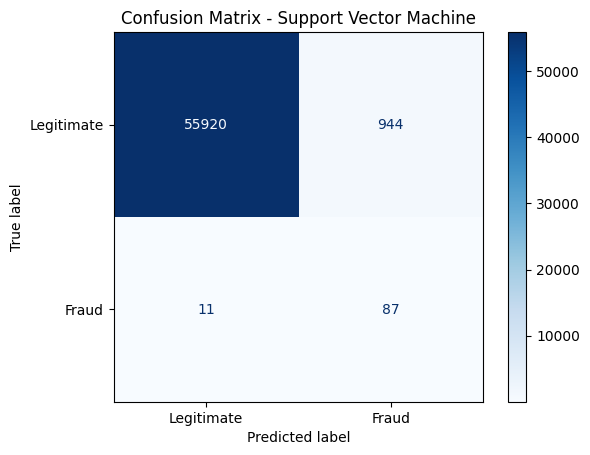

Model: Neural Network
Cross-Validation AUC-ROC Scores: [0.99997251 0.99995864 0.99994423 0.99998983 0.99996329]


<Figure size 800x600 with 0 Axes>

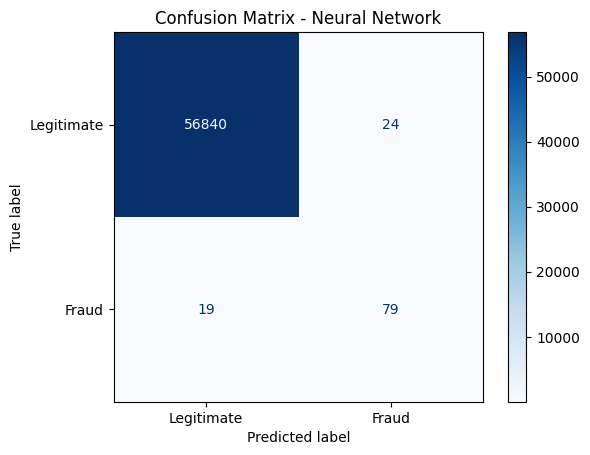

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"Model: {model_name}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print("Cross-Validation AUC-ROC Scores:", cv_scores)

    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Fraud"])
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Feature Importance (for models with feature_importances_)
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        sorted_indices = np.argsort(feature_importances)[::-1]
        sorted_features = X_train.columns[sorted_indices]
        plt.figure(figsize=(12, 6))
        sns.barplot(x=sorted_features, y=feature_importances[sorted_indices])
        plt.title(f"Feature Importance - {model_name}")
        plt.xticks(rotation=90)
        plt.show()

# Call the function for each model
evaluate_model(rf_model, X_train_resampled, y_train_resampled, X_test, y_test, "Random Forest")
evaluate_model(gb_model, X_train_resampled, y_train_resampled, X_test, y_test, "Gradient Boosting")
evaluate_model(svm_model, X_train_resampled, y_train_resampled, X_test, y_test, "Support Vector Machine")
evaluate_model(nn_model, X_train_resampled, y_train_resampled, X_test, y_test, "Neural Network")

In [26]:
from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC score on test data for each model
test_scores = {
    'Random Forest': roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
    'Gradient Boosting': roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]),
    'Support Vector Machine': roc_auc_score(y_test, svm_model.decision_function(X_test)),
    'Neural Network': roc_auc_score(y_test, nn_model.predict_proba(X_test)[:, 1])
}

print("Test AUC-ROC Scores:")
for model_name, score in test_scores.items():
    print(f"{model_name}: {score}")

Test AUC-ROC Scores:
Random Forest: 0.9731024901519414
Gradient Boosting: 0.980743169524422
Support Vector Machine: 0.970561159888829
Neural Network: 0.9618570768205988


**Observation:**

We observe that the feature V14 consistently appears as one of the most important features across different model evaluations and analyses, it suggests that this feature plays a significant role in the model's ability to differentiate between legitimate and fraudulent credit card transactions.The high importance of feature V14 might indicate that it contains information that is particularly relevant to distinguishing fraudulent transactions. It could represent a pattern or behavior associated with fraud.